In [1]:
import torch
from torch import nn
import os

os.environ["CUDA_VISIBLE_DEVICES"]= "5"

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

torch.cuda.device_count()

cuda


1

In [2]:
import torch
import torchvision

In [17]:
model_vgg_weight = torchvision.models.VGG11_Weights.DEFAULT

In [18]:
model_vgg = torchvision.models.vgg11(weights=model_vgg_weight)

In [19]:
lala = torch.LaLaRAND(model_vgg, [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,0,1])

In [33]:
output = torch.randn((16,3,224,224))
lala.inference(output)

tensor([[-2.6078, -0.4508,  3.8321,  ..., -1.1179, -2.7061,  4.9633],
        [-1.7485,  0.2386,  0.1614,  ..., -1.2586,  0.5595,  3.3638],
        [-0.3282,  1.0761, -1.2535,  ..., -0.6091, -0.5321,  2.6615],
        ...,
        [-0.7726, -0.1476,  1.0575,  ..., -1.2317, -1.0638,  4.0983],
        [-3.5902, -1.1326, -0.0130,  ...,  0.2773, -1.7320,  2.0095],
        [-3.1578, -1.5038, -0.7665,  ..., -1.3845, -0.3739,  2.5424]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
!nvidia-smi

Thu Jan 18 11:47:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090         On | 00000000:1D:00.0 Off |                  N/A |
| 30%   36C    P8               34W / 350W|   3649MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
import time
import numpy as np

In [7]:
starter, ender = torch.cuda.Event(enable_timing=True), torch.cuda.Event(enable_timing=True)
repetitions = 300
timings=np.zeros((repetitions,1))

input = torch.randn((16,3,224,224))
for _ in range(10):
    _ = model_vgg(input)
    
# MEASURE PERFORMANCE
with torch.no_grad():
    for rep in range(repetitions):
        input = torch.randn((16,3,224,224))
        starter.record()
        output = model_vgg(input)
        ender.record()
        # WAIT FOR GPU SYNC
        torch.cuda.synchronize()
        curr_time = starter.elapsed_time(ender)
        timings[rep] = curr_time

In [8]:
model_vgg.to('cuda')
starter, ender = torch.cuda.Event(enable_timing=True), torch.cuda.Event(enable_timing=True)
repetitions = 300
gpu_timings=np.zeros((repetitions,1))

input = torch.randn((16,3,224,224)).to('cuda')
for _ in range(10):
    _ = model_vgg(input)
    
# MEASURE PERFORMANCE
with torch.no_grad():
    for rep in range(repetitions):
        input = torch.randn((16,3,224,224)).to('cuda')
        starter.record()
        output = model_vgg(input)
        ender.record()
        # WAIT FOR GPU SYNC
        torch.cuda.synchronize()
        curr_time = starter.elapsed_time(ender)
        gpu_timings[rep] = curr_time

In [13]:
lala = torch.LaLaRAND(model_vgg, [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])

In [20]:
starter, ender = torch.cuda.Event(enable_timing=True), torch.cuda.Event(enable_timing=True)
repetitions = 300
mixed_timings=np.zeros((repetitions,1))

input = torch.randn((16,3,224,224)).to('cuda')
for _ in range(10):
    _ = lala.inference(input)
    
# MEASURE PERFORMANCE
with torch.no_grad():
    for rep in range(repetitions):
        input = torch.randn((16,3,224,224)).to('cuda')
        starter.record()
        output = lala.inference(input)
        ender.record()
        # WAIT FOR GPU SYNC
        torch.cuda.synchronize()
        curr_time = starter.elapsed_time(ender)
        mixed_timings[rep] = curr_time

In [21]:
import matplotlib.pyplot as plt

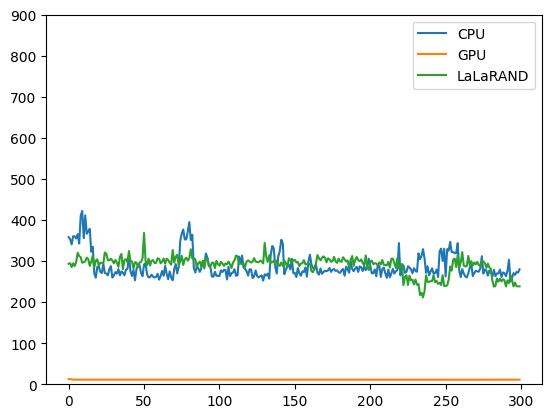

In [22]:
plt.plot(timings, label = 'CPU')
plt.plot(gpu_timings, label = 'GPU')
plt.plot(mixed_timings, label = 'LaLaRAND')
plt.ylim(0,900)
plt.legend()
plt.show()

In [18]:
import pandas as pd

In [19]:
timing = pd.DataFrame({'CPU':[timings.max(), timings.min(), timings.mean()],
                             'GPU':[gpu_timings.max(), gpu_timings.min(), gpu_timings.mean()],
                             'LaLaRAND':[mixed_timings.max(), mixed_timings.min(), mixed_timings.mean()]}, index = ['max', 'min', 'avg'])

In [20]:
timing

,CPU,GPU,LaLaRAND
max,456.629242,11.973824,836.872437
min,266.923004,11.104448,530.579407
avg,336.892289,11.134820,696.081403


In [23]:
import os

In [24]:
os.cpu_count()

64